# Example submissions

This notebook demonstrates how to
* read in training data
* write h5 files for challenge submissions

We'll consider data from two challenges to show how this works for different numbers of conditions.

## Requirements
You'll need the package h5py to read and write files from our website. You can install it via

```pip install h5py```

In this notebook we'll also use numpy and matplotlib, but they aren't strictly necessary.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import h5py

## Linear

### Reading in the challenge data

The training data for this challenge has the following schema:
* Evaluation initial condition - group
  * x - dataset, shape (3,)
* Trajectories - group
  * x1 - dataset, shape (100, 3)

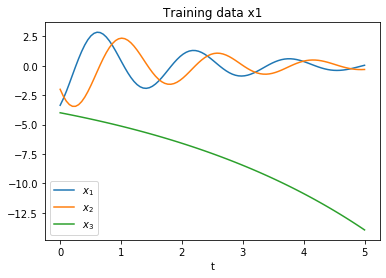

In [2]:
data_file = h5py.File('datasets/synthetic/linear_simple/data.h5', 'r')

x_data = np.array(data_file['Trajectories']['x1'])
x0_eval = np.array(data_file['Evaluation initial condition']['x'])
data_file.close()

t = np.linspace(0, 5, x_data.shape[0])
plt.plot(t, x_data[:, 0], label='$x_1$')
plt.plot(t, x_data[:, 1], label='$x_2$')
plt.plot(t, x_data[:, 2], label='$x_3$')
plt.xlabel('t')
plt.title('Training data x1')
plt.legend()
plt.show()

### Creating a submission
According to the challenge description, the submssion should consist of an hdf5 file with the following structure:
* x - dataset, shape (100, 3)

Let's see how to create such a file.

In [3]:
x_submission = np.random.randn(100, 3)

submission_file = h5py.File('dummy_submission.h5', 'w')
submission_file.create_dataset('x', data=x_submission)
submission_file.close()

## Linear with noise

### Reading in the challenge data and generating a submission
The training data for this challenge is more complicated than in the previous example. It has the schema
* Condition 1 - group
    * Evaluation initial condition - group
        * x - dataset, shape(3,)
    * Trajectories - group
        * x1 - dataset, shape (100, 3)
        * x2 - dataset, shape (100, 3)
        * x3 - dataset, shape (100, 3)
        * x4 - dataset, shape (100, 3)
        * x5 - dataset, shape (100, 3)
* Condition 2 - group
    * Evaluation initial condition - group
        * x - dataset, shape(3,)
    * Trajectories - group
        * x1 - dataset, shape (100, 3)
        * x2 - dataset, shape (100, 3)
        * x3 - dataset, shape (100, 3)
        * x4 - dataset, shape (100, 3)
        * x5 - dataset, shape (100, 3)
* Condition 3 - group
    * Evaluation initial condition - group
        * x - dataset, shape(3,)
    * Trajectories - group
        * x1 - dataset, shape (100, 3)
        * x2 - dataset, shape (100, 3)
        * x3 - dataset, shape (100, 3)
        * x4 - dataset, shape (100, 3)
        * x5 - dataset, shape (100, 3)

The three conditions are meant to be treated separately, so we will first create an empty submission file, then update it as we loop over the three conditions. Alternatively, we could collect the training data for the three conditions before generating any submssion results.

The submission file is expected to have the form
* Condition 1 - group
    * x - dataset, shape (100, 3)
* Condition 2 - group
    * x - dataset, shape (100, 3)
* Condition 3 - group
    * x - dataset, shape (100, 3)

In [4]:
submission_file = h5py.File('dummy_submission.h5', 'w')
data_file = h5py.File('datasets/synthetic/linear_noise/data.h5', 'r')

Note that you can view the structure of an h5 file with the `visit` function.

In [5]:
data_file.visit(print)

Condition 1
Condition 1/Evaluation initial condition
Condition 1/Evaluation initial condition/x
Condition 1/Trajectories
Condition 1/Trajectories/x1
Condition 1/Trajectories/x2
Condition 1/Trajectories/x3
Condition 1/Trajectories/x4
Condition 1/Trajectories/x5
Condition 2
Condition 2/Evaluation initial condition
Condition 2/Evaluation initial condition/x
Condition 2/Trajectories
Condition 2/Trajectories/x1
Condition 2/Trajectories/x2
Condition 2/Trajectories/x3
Condition 2/Trajectories/x4
Condition 2/Trajectories/x5
Condition 3
Condition 3/Evaluation initial condition
Condition 3/Evaluation initial condition/x
Condition 3/Trajectories
Condition 3/Trajectories/x1
Condition 3/Trajectories/x2
Condition 3/Trajectories/x3
Condition 3/Trajectories/x4
Condition 3/Trajectories/x5


In [6]:
for cond in [1, 2, 3]:
    # Read in training data for all five trajectories
    x_data = [
        np.array(traj) for traj in data_file[f'Condition {cond}']['Trajectories'].values()
    ]
    
    # Read in initial condition
    x0_eval = np.array(data_file[f'Condition {cond}']['Evaluation initial condition']['x'])
    
    # Generate a submission
    x_submission = np.random.randn(100, 3)
    
    # Add result to submission file
    group = submission_file.create_group(f'Condition {cond}')
    group.create_dataset('x', data=x_submission)

data_file.close()
submission_file.close()